In [1]:
import librosa
import librosa.display
import pyaudio 
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import wave
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import speech_recognition as sr
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import load_model
import datetime

start_time = datetime.datetime.now()
DATA_PATH = "./data/"

tf_classes = 0
def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
      
    global tf_classes
    
    folders = os.listdir(path)

    for folder in folders:
        if not os.path.isdir(path):continue #폴더가 아니면 continue                   
        files = os.listdir(path+"/"+folder)        
        print("Foldername :",folder,"-",len(files),"파일")
        #폴더 이름과 그 폴더에 속하는 파일 갯수 출력
        for wav in files:
            if not wav.endswith(".wav"):continue
            else:               
               
                label = [0 for i in range(len(folders))]
                label[tf_classes] = 1
                
                #print(Y_label)
        tf_classes = tf_classes+1
    #end loop

 
    

load_wave_generator(DATA_PATH)

end_time = datetime.datetime.now()
print("\nelasped time = ",end_time- start_time)



Foldername : 0 - 21 파일
Foldername : 1 - 20 파일
Foldername : 2 - 19 파일
Foldername : 3 - 20 파일
Foldername : 4 - 24 파일
Foldername : 5 - 20 파일
Foldername : 6 - 19 파일
Foldername : 7 - 14 파일
Foldername : 8 - 23 파일
Foldername : 9 - 19 파일
Foldername : data_10 - 19 파일

elasped time =  0:00:00.009973


Using TensorFlow backend.


Start to record the audio.
Recording is finished.


C:\user\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


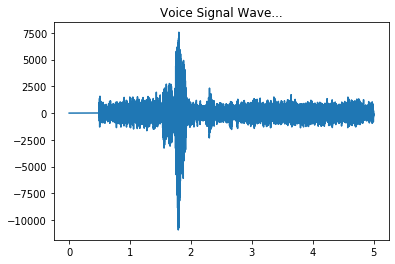

앉아


In [16]:
import speech_recognition as sr
##### 변수 설정 부분 #####
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 5 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output_noise.wav"

######## 음성 데이터를 녹음 해 저장하는 부분 ########

p = pyaudio.PyAudio() # 오디오 객체 생성

stream = p.open(format=FORMAT, # 16비트 포맷
                channels=CHANNELS, #  모노로 마이크 열기
                rate=RATE, #비트레이트
                input=True,
                frames_per_buffer=CHUNK) # CHUNK만큼 버퍼가 쌓인다.

print("Start to record the audio.")

frames = [] # 음성 데이터를 채우는 공간

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)): 
    #지정한  100ms를 몇번 호출할 것인지 10 * 5 = 50  100ms 버퍼 50번채움 = 5초
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording is finished.")

stream.stop_stream() # 스트림닫기
stream.close() # 스트림 종료
p.terminate() # 오디오객체 종료

# WAVE_OUTPUT_FILENAME의 파일을 열고 데이터를 쓴다.
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb') 
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

spf = wave.open(WAVE_OUTPUT_FILENAME,'r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, dtype=np.int16)

#시간 흐름에 따른 그래프를 그리기 위한 부분
Time = np.linspace(0,len(signal)/RATE, num=len(signal)) 

plt.figure(1)
plt.title('Voice Signal Wave...')
#plt.plot(signal) // 음성 데이터의 그래프
plt.plot(Time, signal)
plt.show()

r= sr.Recognizer()
text = sr.AudioFile("./output_noise.wav")

with text as source:
    audio = r.record(source)

print(r.recognize_google(audio,language='ko-KR'))

In [21]:
import speech_recognition as sr
            
model = load_model('train_surv_time-0.1942.hdf5')
y, sr = librosa.load("./output_kgh2.wav")

X_test_input = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
# data feature 무엇인지 설명하기, data를 noise있는거로, RBM-> noise낀 데이터에서 특징 뽑아내기
'''
0 박경윤
1 문성호
2 신지연
3 KCK
4 KYH
5 KYH's friend
6 YJS
7 YJM
8 KSR
9 KGH
10 SMH
'''
label = [0 for i in range(tf_classes)]#class가 3개이니까 y_test_input만드는 과정

Y_test_input = []
for i in range(len(X_test_input)):
    Y_test_input.append(label)

print(np.shape(X_test_input))
print(np.shape(Y_test_input))

# 학습한 모델을 베이스로 각 input data가 어느 클래스에 가장 가까운지 나타낸 결과
# 어떤 클래스인지 추정하는 정확도 = 학습한 정확도
result = model.predict_classes(X_test_input)
print(result)


user = list(range(tf_classes))
count = 0
#클래스별 추정된 수 카운트
for j in range(len(user)):
    for k in range(len(result)):
        if  result[k] == user[j] :
            count += 1
    user[j] = count
    count = 0

for i in range(len(user)):
    print(i, "번째 class : ", user[i], "\n" )
    
max = 0
class_num = 0
#카운트 된 수를 토대로 뽑아낸 정확도(input)
for i in range(len(user)):
    if max <= user[i]:
        max = user[i]
        class_num = i
result_acc =  max / len(X_test_input)
if class_num == 0:
    print("박경윤 Smiliarity for result : ", result_acc*100, " %")
elif class_num == 1:
    print("문성호 Smiliarityy for result : ", result_acc*100, " %")
elif class_num == 2:
    print("신지연 Smiliarity for result : ", result_acc*100, " %")
elif class_num == 3:
    print("KCK Smiliarity for result : ", result_acc*100, " %")
elif class_num == 4:
    print("KYH Smiliarity for result : ", result_acc*100, " %")
elif class_num == 5:
    print("KYH's friend Smiliarity for result : ", result_acc*100, " %")
elif class_num == 6:
    print("YJS Smiliarity for result : ", result_acc*100, " %")
elif class_num == 7:
    print("YJM Smiliarity for result : ", result_acc*100, " %") 
elif class_num == 8:
    print("KSR Smiliarity for result : ", result_acc*100, " %")
elif class_num == 9:
    print("KGH Smiliarity for result : ", result_acc*100, " %") 
elif class_num == 10:
    print("SMH Smiliarity for result : ", result_acc*100, " %")

(571, 20)
(571, 11)
[ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  4  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  2  9  9  9  9  9  9  9 10 10 10 10 10  4 10 10
  4 10  9  9  7  9  9  9  9  9  9  9  9  9  9  3  9  9  9  1  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  1  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  1  0  0  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  4  4  9  9  9  9  9  9  9 